<a href="https://colab.research.google.com/github/HalimaAshraf/Artificial_Intelligence/blob/main/sentiment_analysis_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Input dataset

In [ ]:
data_train = pd.read_csv('/content/train.tsv.zip',sep='\t')
data_test = pd.read_csv('/content/test.tsv.zip',sep='\t')
data_sample = pd.read_csv('/content/sampleSubmission.csv')

Melihat keseluruhan data

In [ ]:
data_train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
data_test

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
data_sample

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


Melihat informasi dataset

In [ ]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
print(data_train.Sentiment.value_counts(normalize=True).sort_index())

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


<Axes: >

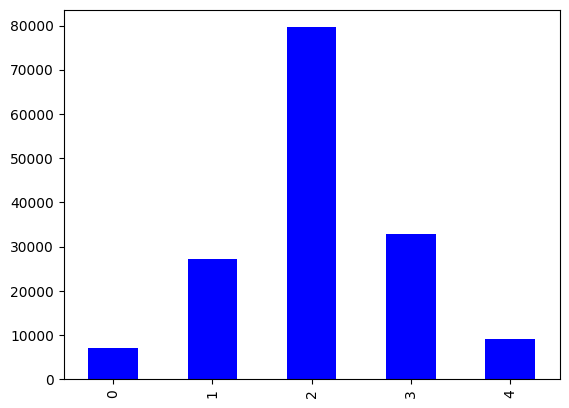

In [ ]:
data_train.Sentiment.value_counts().sort_index().plot(kind='bar',color='b')

<Axes: title={'center': 'Chart Sentiment Class'}, ylabel='Sentiment'>

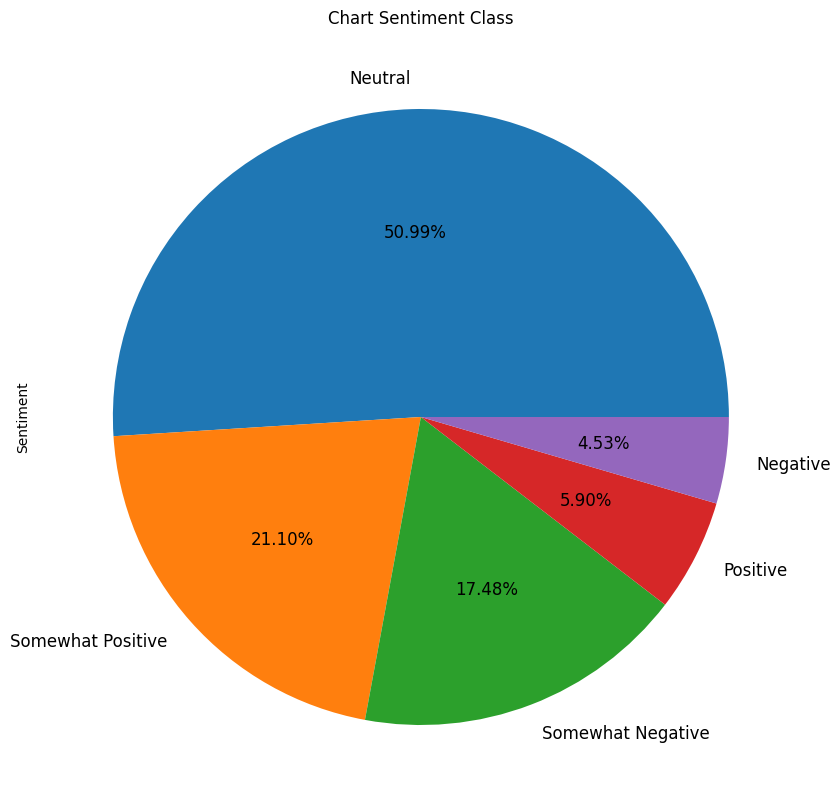

In [ ]:
data2=data_train.copy(deep=True)
pie1=pd.DataFrame(data2['Sentiment'].replace(0,'Negative').replace(1,'Somewhat Negative').replace(2,'Neutral').replace(3,'Somewhat Positive').replace(4,'Positive').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Chart Sentiment Class',y = 'Sentiment', 
          autopct='%1.2f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=12, figsize=(10,10))

TF-IDF untuk membuat data cleaning dan vektorisasi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer  = SnowballStemmer(language='english')

def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

eng_stopword = stopwords.words('english')
', '.join(eng_stopword[:115])
selected_stopwords = eng_stopword[:115]

vectorizer = TfidfVectorizer(tokenizer=tokenize,stop_words = selected_stopwords,ngram_range=(1,2),max_features=2000)

vectorizer.fit(data_train.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'll', 'onc', 'ourselv', 're', 'themselv', 've', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


Selanjutnya vektorisasi data 'Phrase'

In [ ]:
input = vectorizer.transform(data_train.Phrase)

In [ ]:
testin = vectorizer.transform(data_test.Phrase)

Mengsplit data sebagai data training

In [ ]:
TRAIN_SIZE = 100_000
data_train_inputs = input[:TRAIN_SIZE]
data_train_targets = data_train.Sentiment[:TRAIN_SIZE]
data_train_inputs.shape,data_train_targets.shape

In [ ]:
valid_inputs = input[TRAIN_SIZE:]
valid_targets = data_train.Sentiment[TRAIN_SIZE:]
valid_inputs.shape,valid_targets.shape

Mengklasifikasi menggunakan Decision Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

model = tree.DecisionTreeClassifier()
model.fit(data_train_inputs, data_train_targets)

Memproses data training dari dataset

In [ ]:
train_pred = model.predict(data_train_inputs)

In [ ]:
data_train_targets

In [ ]:
train_pred

Hasil training untuk nilai akurasi dalam dataset train

In [ ]:
print("Hasil Nilai Akurasi dari training data :"+str('{:04.2f}'.format(accuracy_score(data_train_targets,train_pred)*100))+'%')

Nilai akurasi dalam validasi data 

In [ ]:
valid_pred = model.predict(valid_inputs)
print("Hasil nilai akurasi dari validasi data :"+str('{:04.2f}'.format(accuracy_score(valid_targets,valid_pred)*100))+'%')

Klasifikasi data dari tiap subsampelnya

In [ ]:
from sklearn.metrics import classification_report

Hasil_train = classification_report(data_train_targets,train_pred)
print(Hasil_train)

In [ ]:
Hasil_valid = classification_report(valid_targets,valid_pred)
print(Hasil_valid)

Model dalam dataset test

In [ ]:
test_input = testin

test_pred= model.predict(test_input)
test_pred

In [ ]:
len(test_pred)

Hasil testing dalam dataset test

In [ ]:
data_sample.Sentiment = test_pred
data_sample

In [ ]:
data_sample.to_csv('data_sample.csv',index=None)

In [ ]:
data_sample